<a href="https://colab.research.google.com/github/Grupo242022/EyCD/blob/main/Entregable_2_parte1_ejercicio2_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **DIPLOMATURA 2022**

# EXPLORACIÓN Y CURACIÓN DE DATOS

## Entregable # 2 Parte 1 - Ejercicio 2

## GRUPO Nº24

## INTEGRANTES:
   - Clarisa Manzone
   - Nico Rosales
   - Daniel Rubio
   - Diana Fonnegra   

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context('talk')


In [2]:
pd.options.display.float_format = '{:.2f}'.format

### 2. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.

### - Rta//: Distribución de variables y eliminación de outliers:

### Pasamos a definir los conjuntos de datos

1.   *df_melb* -> Presenta los datos de los precios de las casas de Melbourne.
2.   *df_airbnb* -> Contiene los datos de los alquileres de airbnb en Melbourne.

### A su vez se seleccionan las columnas de interés para el conjunto df_airbnb:
*   *description*
*   *neighborhood_overview*
*   *street*
*   *neighborhood*
*   *city*
*   *suburb*
*   *state*
*   *zipcode*
*   *price*
*   *weekly_price*
*   *monthly_price*
*   *latitude*
*   *longitude*


In [3]:
url_1 = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv'
url_2 = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv'
df_melb = pd.read_csv(url_1)

# Definiendo filtro de columnas de interes - df_airbnb
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]

# Aplicando filtro:
df_airbnb = pd.read_csv(url_2, usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### * Exploramos las columnas de ambos df:

In [4]:
print(df_melb.columns)
print(df_airbnb.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price',
       'weekly_price', 'monthly_price'],
      dtype='object')


In [5]:
# Descripción General del conjunto df_melb:
df_melb.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.00,2.94,0.96,1.00,2.00,3.00,3.00,10.00
Price,13580.00,1075684.08,639310.72,85000.00,650000.00,903000.00,1330000.00,9000000.00
Distance,13580.00,10.14,5.87,0.00,6.10,9.20,13.00,48.10
Postcode,13580.00,3105.30,90.68,3000.00,3044.00,3084.00,3148.00,3977.00
Bedroom2,13580.00,2.91,0.97,0.00,2.00,3.00,3.00,20.00
Bathroom,13580.00,1.53,0.69,0.00,1.00,1.00,2.00,8.00
Car,13518.00,1.61,0.96,0.00,1.00,2.00,2.00,10.00
Landsize,13580.00,558.42,3990.67,0.00,177.00,440.00,651.00,433014.00
BuildingArea,7130.00,151.97,541.01,0.00,93.00,126.00,174.00,44515.00
YearBuilt,8205.00,1964.68,37.27,1196.00,1940.00,1970.00,1999.00,2018.00


In [6]:
df_melb.Price.describe()

count     13580.00
mean    1075684.08
std      639310.72
min       85000.00
25%      650000.00
50%      903000.00
75%     1330000.00
max     9000000.00
Name: Price, dtype: float64

In [7]:
print(f'Consultando el total de datos nulos para la columna Price: {df_melb.Price.isnull().sum()}')

Consultando el total de datos nulos para la columna Price: 0


### Del anterior se puede notar que:

*  El precio de las casas varían desde \$85.000 dólares hasta \$9.000.000

*  Además, tenemos una desviación estandar de \$639.310.




### * Visualizamos en un boxplot la distribución de los valores (Precio):

Text(0.5, 1.0, 'Distribución de los Precios de Casas en Melbourne')

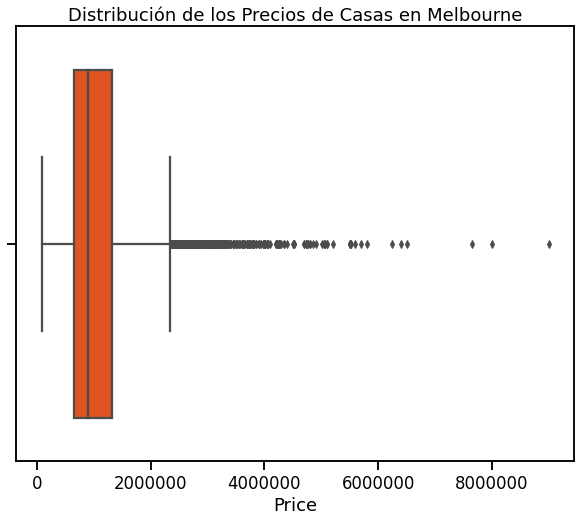

In [8]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_melb, x='Price',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribución de los Precios de Casas en Melbourne')

### * Dada la cantidad de valores átipicos presentes en la variable precio, definimos los umbrales según los cuantiles *0.05* y *0.95*, y filtramos la informacion en función de los mismos:

In [9]:
quantile_05 = 0.05
quantile_95 = 0.95

# Filtrado a partir de cuantiles:
df_melb_perc = df_melb.loc[ (df_melb.Price > df_melb.Price.quantile(quantile_05)) \
                           & (df_melb.Price < df_melb.Price.quantile(quantile_95))]


df_melb_perc.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,12214.00,2.96,0.88,1.00,2.00,3.00,3.00,10.00
Price,12214.00,1011430.30,430553.36,406000.00,672000.00,904000.00,1290000.00,2290000.00
Distance,12214.00,10.30,5.90,0.00,6.30,9.70,13.10,48.10
Postcode,12214.00,3103.64,90.96,3000.00,3044.00,3082.00,3147.00,3977.00
Bedroom2,12214.00,2.93,0.89,0.00,2.00,3.00,3.00,20.00
Bathroom,12214.00,1.51,0.65,0.00,1.00,1.00,2.00,8.00
Car,12155.00,1.61,0.95,0.00,1.00,2.00,2.00,10.00
Landsize,12214.00,523.84,1513.17,0.00,188.25,438.00,648.00,76000.00
BuildingArea,6352.00,149.69,570.14,0.00,96.00,126.00,168.00,44515.00
YearBuilt,7280.00,1965.09,37.16,1196.00,1941.00,1970.00,2000.00,2018.00


### * Comparando los conjuntos de datos (inicial vs filtrado a partir de cuantiles):

In [10]:
print(f'Tamaño del conjunto inicial - df_melb: {len(df_melb)}')
print(f'Media del conjunto inicial - df_melb:  {df_melb.Price.mean():.2f}')
print('---- ----- ----- ------ ----- ---- ----- ----- ------ ----- \n')

print(f'Tamaño del conjunto filtrado - df_melb_perc: \t{len(df_melb_perc)}')
print(f'Media del conjunto filtrado - df_melb_perc:  \t{df_melb_perc.Price.mean():.2f}')

print(f'Filas debajo del percentil 0.05 en el conjunto inicial: \
{len(df_melb.loc[df_melb.Price < df_melb.Price.quantile(quantile_05)])}')

print(f'Filas arriba del percentil 0.95 en el conjunto inicial: \
{len(df_melb.loc[df_melb.Price > df_melb.Price.quantile(quantile_95)])}')
print('---- ----- ----- ------ ----- ---- ----- ----- ------ ----- \n')

print(f'Filas extraídas del conjunto inicial: {len(df_melb) - len(df_melb_perc)}')

Tamaño del conjunto inicial - df_melb: 13580
Media del conjunto inicial - df_melb:  1075684.08
---- ----- ----- ------ ----- ---- ----- ----- ------ ----- 

Tamaño del conjunto filtrado - df_melb_perc: 	12214
Media del conjunto filtrado - df_melb_perc:  	1011430.30
Filas debajo del percentil 0.05 en el conjunto inicial: 671
Filas arriba del percentil 0.95 en el conjunto inicial: 679
---- ----- ----- ------ ----- ---- ----- ----- ------ ----- 

Filas extraídas del conjunto inicial: 1366


### * Boxplot: distribución de los valores (Precio) - filtrado por cuantil.

Text(0.5, 1.0, 'Distribución de los Precios de Casas en Melbourne - filtrado')

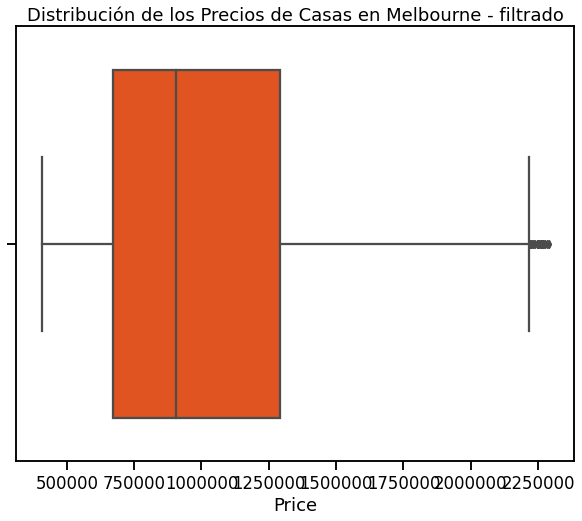

In [11]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_melb_perc, x='Price',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribución de los Precios de Casas en Melbourne - filtrado')

### * Consultas sobre el conjunto filtrado:

In [12]:
# Habitaciones:
print(f'Máximo de habitaciones en el dataset: {df_melb_perc.Rooms.max()}')

Máximo de habitaciones en el dataset: 10


### * Se construyó un contador que separa y totaliza la cantidad de habitaciones presentes en el conjunto:

In [13]:
def contar_habitaciones(column):
  
  for hab in range(column.max()+1):
    for row in column:
    
      contador = column.loc[column == hab].sum()
    print(f'Cantidad de casas con {hab} habitaciones: {contador}')

In [14]:
contar_habitaciones(df_melb_perc.Rooms)

Cantidad de casas con 0 habitaciones: 0
Cantidad de casas con 1 habitaciones: 283
Cantidad de casas con 2 habitaciones: 6812
Cantidad de casas con 3 habitaciones: 17025
Cantidad de casas con 4 habitaciones: 9408
Cantidad de casas con 5 habitaciones: 2140
Cantidad de casas con 6 habitaciones: 330
Cantidad de casas con 7 habitaciones: 49
Cantidad de casas con 8 habitaciones: 56
Cantidad de casas con 9 habitaciones: 0
Cantidad de casas con 10 habitaciones: 10


### * Filtramos la información teniendo en cuenta aquellos registros que solo tengan una habitación:

In [15]:
df_melb_perc.loc[df_melb_perc.Rooms == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,283.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
Price,283.00,575537.28,259961.04,407000.00,440000.00,482500.00,562500.00,2115000.00
Distance,283.00,4.92,3.06,0.70,2.75,4.50,6.10,21.50
Postcode,283.00,3113.67,63.62,3000.00,3058.00,3122.00,3181.00,3207.00
Bedroom2,283.00,1.05,0.25,1.00,1.00,1.00,1.00,3.00
Bathroom,283.00,1.01,0.13,0.00,1.00,1.00,1.00,2.00
Car,280.00,0.88,0.55,0.00,1.00,1.00,1.00,4.00
Landsize,283.00,382.87,1021.57,0.00,0.00,0.00,248.50,8223.00
BuildingArea,138.00,61.06,31.23,1.00,50.00,55.00,62.00,303.00
YearBuilt,176.00,1976.82,34.46,1888.00,1960.00,1985.00,2005.00,2016.00


### * Repetimos el paso anterior esta vez teniendo en cuenta aquellos registros que tengan dos habitación:

In [16]:
df_melb_perc.loc[df_melb_perc.Rooms == 2].describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,3406.00,2.00,0.00,2.00,2.00,2.00,2.00,2.00
Price,3406.00,791766.24,311606.65,406000.00,566000.00,706000.00,930750.00,2265000.00
Distance,3406.00,7.55,4.17,0.00,4.50,7.00,10.40,38.00
Postcode,3406.00,3102.41,62.10,3000.00,3053.00,3087.00,3161.00,3782.00
Bedroom2,3406.00,2.02,0.21,0.00,2.00,2.00,2.00,5.00
Bathroom,3406.00,1.14,0.37,0.00,1.00,1.00,1.00,3.00
Car,3380.00,1.13,0.69,0.00,1.00,1.00,1.00,6.00
Landsize,3406.00,423.18,1466.31,0.00,0.00,159.00,368.00,37000.00
BuildingArea,1729.00,94.49,102.17,0.00,73.00,85.00,102.00,3558.00
YearBuilt,2107.00,1966.03,37.41,1830.00,1950.00,1970.00,2000.00,2018.00


### * Excluimos aquellos los registros en donde los baños y dormitorios superen el número de habitaciónes habitación. A su vez, tomamos esto un como criterio de limpieza de la base de datos:

In [17]:
df_melb_perc.loc[~(df_melb_perc.Rooms < df_melb_perc.Bedroom2 + df_melb_perc.Bathroom)].describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,249.00,3.35,0.95,2.00,3.00,3.00,4.00,8.00
Price,249.00,1046680.72,410738.50,410000.00,758500.00,970000.00,1295000.00,2250000.00
Distance,249.00,8.45,3.69,1.50,6.30,8.20,11.20,34.90
Postcode,249.00,3083.86,57.86,3000.00,3039.00,3072.00,3127.00,3207.00
Bedroom2,249.00,2.14,0.88,0.00,2.00,2.00,3.00,6.00
Bathroom,249.00,1.01,0.54,0.00,1.00,1.00,1.00,3.00
Car,249.00,1.31,0.97,0.00,1.00,1.00,2.00,5.00
Landsize,249.00,424.06,351.16,0.00,209.00,426.00,600.00,4051.00
BuildingArea,117.00,143.50,114.37,20.00,99.00,126.00,155.00,1022.00
YearBuilt,131.00,1944.38,33.72,1890.00,1920.00,1950.00,1965.00,2014.00


### * Eliminando aquellos registros que la cantidad de dormitorios y baños, superen la cantidad de habitaciones (para la limpieza del conjunto de datos):

In [18]:
df_melb_clean = df_melb_perc.loc[df_melb_perc.Rooms < df_melb_perc.Bedroom2 + df_melb_perc.Bathroom]

In [19]:
# Conteo de los resultantes:
contar_habitaciones(df_melb_clean.Rooms)

Cantidad de casas con 0 habitaciones: 0
Cantidad de casas con 1 habitaciones: 283
Cantidad de casas con 2 habitaciones: 6744
Cantidad de casas con 3 habitaciones: 16650
Cantidad de casas con 4 habitaciones: 9124
Cantidad de casas con 5 habitaciones: 2080
Cantidad de casas con 6 habitaciones: 306
Cantidad de casas con 7 habitaciones: 42
Cantidad de casas con 8 habitaciones: 40
Cantidad de casas con 9 habitaciones: 0
Cantidad de casas con 10 habitaciones: 10


In [20]:
df_melb_recort = df_melb_clean.loc[df_melb_clean.Rooms < 7]

df_melb_recort.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,11953.00,2.94,0.86,1.00,2.00,3.00,3.00,6.00
Price,11953.00,1010356.66,430771.84,406000.00,670000.00,901000.00,1290000.00,2290000.00
Distance,11953.00,10.34,5.93,0.00,6.30,9.70,13.30,48.10
Postcode,11953.00,3104.05,91.51,3000.00,3044.00,3082.00,3148.00,3977.00
Bedroom2,11953.00,2.95,0.87,1.00,2.00,3.00,3.00,20.00
Bathroom,11953.00,1.52,0.64,0.00,1.00,1.00,2.00,8.00
Car,11894.00,1.62,0.95,0.00,1.00,2.00,2.00,10.00
Landsize,11953.00,525.79,1528.68,0.00,188.00,438.00,649.00,76000.00
BuildingArea,6230.00,149.76,575.47,0.00,96.00,126.00,168.01,44515.00
YearBuilt,7142.00,1965.46,37.12,1196.00,1945.00,1970.00,2000.00,2018.00


In [21]:
print("Cantidad de habitaciones por Suburbio")
print(df_melb_perc.groupby("Rooms")["Suburb"].count())

Cantidad de habitaciones por Suburbio
Rooms
1      283
2     3406
3     5675
4     2352
5      428
6       55
7        7
8        7
10       1
Name: Suburb, dtype: int64


### * Agregar información adicional respectiva al entorno de una propiedad a partir del conjunto de datos de AirBnB utilizado en el práctico.
### * Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna price, o aplicar múltiples transformaciones como la mediana o el mínimo.

### - Rta//: Ahora vamos a analizar el conjunto de datos df_airbnb: 

#### * Descriptivos:

In [22]:
# Estadisticos descriptivo sobre el cojunto de datos:
df_airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,22895.00,-37.83,0.07,-38.22,-37.85,-37.82,-37.80,-37.48
longitude,22895.00,145.01,0.13,144.48,144.96,144.98,145.01,145.84
price,22895.00,148.00,210.88,0.00,71.00,111.00,165.00,12624.00
weekly_price,2524.00,906.98,821.22,91.00,450.00,750.00,1066.00,11536.00
monthly_price,1891.00,3234.35,2808.09,400.00,1700.00,2800.00,3912.50,54258.00


#### * Tipos de variables presentes en el conjunto de Airbnb:

In [23]:
df_airbnb.dtypes

description               object
neighborhood_overview     object
street                    object
neighborhood              object
city                      object
suburb                    object
state                     object
zipcode                   object
latitude                 float64
longitude                float64
price                      int64
weekly_price             float64
monthly_price            float64
dtype: object

### * Revisamos la variable Zipcode:

In [24]:
df_airbnb.zipcode.value_counts()

3000.0        2491
3000           876
3006.0         860
3182.0         579
3182           556
              ... 
3096             1
3812             1
3000\n3000       1
3752             1
4068.0           1
Name: zipcode, Length: 463, dtype: int64

### * Como se puede notar algunos registros (por ejemplo caso *Zipcode*: 3000.0 -> 2491 y 3000 -> 876), estan tomados como valores flotantes y otros como enteros es por esto que se necesitan unificarlos. 

In [25]:
df_airbnb = df_airbnb.loc[~(df_airbnb.zipcode.isnull())]

In [26]:
df_airbnb['zipcode'] = pd.to_numeric(df_airbnb.zipcode, errors='coerce')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_airbnb.zipcode.value_counts() # despues de unificar


3000.00     3367
3006.00     1268
3182.00     1135
3141.00      881
3004.00      728
            ... 
3785.00        1
3096.00        1
30122.00       1
3912.00        1
4068.00        1
Name: zipcode, Length: 247, dtype: int64

In [28]:
len(df_airbnb.zipcode.unique())

248

# * Nico - Por favor Detallar:

In [29]:
hist_zipcode = df_airbnb.zipcode.value_counts().to_frame(name='Cantidad de casas')
hist_zipcode = hist_zipcode.rename_axis(index='zipcode')

In [30]:
print(len(hist_zipcode))
print(len(hist_zipcode.loc[hist_zipcode['Cantidad de casas'] > 300]))
print(len(hist_zipcode.loc[hist_zipcode['Cantidad de casas'] > 200]))
print(len(hist_zipcode.loc[hist_zipcode['Cantidad de casas'] > 100]))
print(len(hist_zipcode.loc[hist_zipcode['Cantidad de casas'] > 75]))
print(len(hist_zipcode.loc[hist_zipcode['Cantidad de casas'] > 50]))

247
15
23
48
60
83


### * Agrupando la cantidad de registros presentes en zipcode:

In [31]:
df_airbnb['zipcode_count'] = df_airbnb.groupby('zipcode')['zipcode'].transform('count')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
intersection = np.intersect1d(df_airbnb.zipcode.values, df_melb_perc.Postcode.values, \
                              assume_unique=False)

# Controlando: 
print(f'Valores únicos para Airbnb-Zipcodes len/unique: {df_airbnb.zipcode.isna().sum()}')
print(f'Valores únicos para Airbnb-Zipcodes len/unique: {len(df_airbnb.zipcode.unique())}')
print(f'Valores únicos para Airbnb-Zipcodes: {df_airbnb.zipcode.nunique()}')
print(f'Valores únicos para df_Melbourne-Zipcodes: {df_melb_perc.Postcode.nunique()}')
print(f'Elementos en común entre los conjuntos de datos dado el zipcodes: {intersection.size}')

Valores únicos para Airbnb-Zipcodes len/unique: 4
Valores únicos para Airbnb-Zipcodes len/unique: 248
Valores únicos para Airbnb-Zipcodes: 247
Valores únicos para df_Melbourne-Zipcodes: 196
Elementos en común entre los conjuntos de datos dado el zipcodes: 191


### Se tomaron del conjunto de datos *df_airbnb* las variables relevantes: price, weekly_price, monthly_price, zipcode y se formo: *airbnb_price_by_zipcode* con columnas adicionales *(media y conteo)*:

In [33]:
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode']
## Option:
# Pass as argument name the new name of the column, and as value a tuple where
# the first value is the original column and the second value is the operation.
airbnb_price_by_zipcode = df_airbnb[relevant_cols].groupby('zipcode')\
  .agg(airbnb_record_count=('price', 'count'),
       airbnb_price_mean=('price', 'mean'),
       airbnb_price_median=('price', 'median'),
       airbnb_weekly_price_mean=('weekly_price', 'mean'),
       airbnb_weekly_price_median=('weekly_price', 'median'),
       airbnb_monthly_price_mean=('monthly_price', 'mean'),
       airbnb_monthly_price_median=('monthly_price', 'median'))\
  .reset_index()


print(f'Forma airbnb_price_by_zipcode \n: {airbnb_price_by_zipcode.shape}')

Forma airbnb_price_by_zipcode 
: (247, 8)


In [34]:
airbnb_price_by_zipcode.isna().sum()

zipcode                         0
airbnb_record_count             0
airbnb_price_mean               0
airbnb_price_median             0
airbnb_weekly_price_mean       63
airbnb_weekly_price_median     63
airbnb_monthly_price_mean      79
airbnb_monthly_price_median    79
dtype: int64

### * Dado el anterior se realiza el merge a partir de zipcode:

In [35]:
# Merge:
df_merged_sales = df_melb_perc.merge(airbnb_price_by_zipcode, how='left',\
    left_on='Postcode', right_on='zipcode')


In [36]:
# Consultando valores nulos:
missing_values_count = df_merged_sales['airbnb_price_mean'].isna().sum()
missing_values_count

17

### * Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas.

### - Rta//: Para investigar otras 2 variables que puedan servir para combinar los datos, se muestran la cantidad de registros y variables disponibles en cada una de ellas:

In [37]:
print(f'Variables posibles en df_airbnb: \n{df_airbnb.nunique()}\n')
print('----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ')
print(f'Variables posibles en df_melb_perc: \n{df_melb_perc.nunique()}')


Variables posibles en df_airbnb: 
description              21545
neighborhood_overview    11973
street                     628
neighborhood                59
city                        30
suburb                     535
state                       26
zipcode                    247
latitude                 22732
longitude                22561
price                      458
weekly_price               593
monthly_price              632
zipcode_count              113
dtype: int64

----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 
Variables posibles en df_melb_perc: 
Suburb             310
Address          12046
Rooms                9
Type                 3
Price             1762
Method               5
SellerG            257
Date                58
Distance           200
Postcode           196
Bedroom2            12
Bathroom             8
Car                 11
Landsize          1337
BuildingArea       534
YearBuilt          134
CouncilArea     

### * De los anteriores notamos variables presentes en ambos conjuntos como: suburbio, combinación de: latitud-longitud.

### * Criterio 1: *coincidencias* en los registros/variables. 

In [38]:
int_suburb = np.isin(df_melb_perc.Suburb,df_airbnb.suburb, assume_unique=True)
print(f'Registros en las bases de datos que presentan correspondencia:\n  {sum(int_suburb)}')

Registros en las bases de datos que presentan correspondencia:
  12099


### * Criterio 2: *exploración visual* considerando a la información geográfica como un criterio para combinar los conjuntos de datos, y verificando que los registros se tratan de zonas similares.

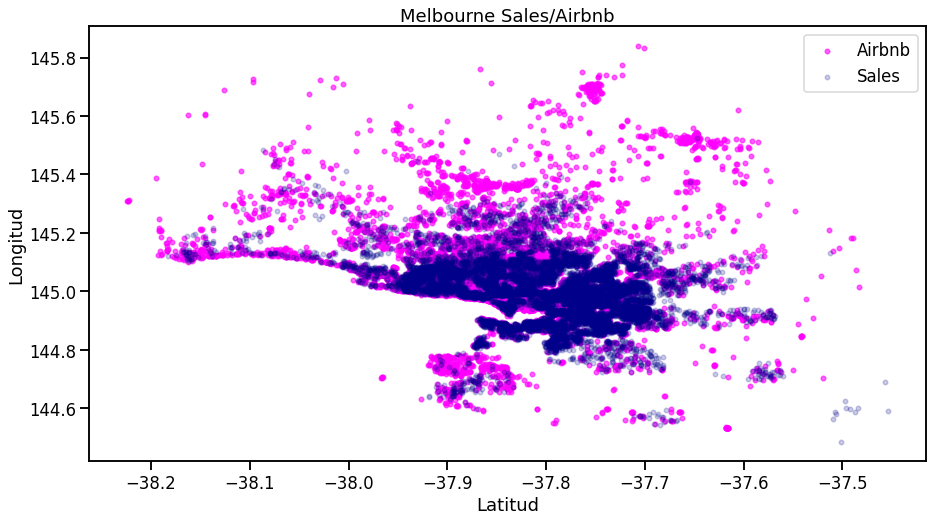

In [39]:
fig, ax = plt.subplots(facecolor='white')
fig.set_size_inches(15,8)
ax.scatter(df_airbnb["latitude"], df_airbnb["longitude"], marker=".",color='magenta', alpha = 0.6, label='Airbnb')
ax.scatter(df_melb_perc["Lattitude"], df_melb_perc["Longtitude"], marker=".", color='darkblue', alpha = 0.2, label='Sales')
ax.legend()
ax.set_xlabel("Latitud")
ax.set_ylabel("Longitud")
plt.title("Melbourne Sales/Airbnb")

plt.show()


### *Antes de finalizar el eercicio se realiza el reconocimiento de los valores faltantes:

In [ ]:
df_merged_sales.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12214 entries, 0 to 12213
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Suburb                       12214 non-null  object 
 1   Address                      12214 non-null  object 
 2   Rooms                        12214 non-null  int64  
 3   Type                         12214 non-null  object 
 4   Price                        12214 non-null  float64
 5   Method                       12214 non-null  object 
 6   SellerG                      12214 non-null  object 
 7   Date                         12214 non-null  object 
 8   Distance                     12214 non-null  float64
 9   Postcode                     12214 non-null  float64
 10  Bedroom2                     12214 non-null  float64
 11  Bathroom                     12214 non-null  float64
 12  Car                          12155 non-null  float64
 13  Landsize        

In [ ]:
missing_values_count = df_merged_sales.isna().sum()
missing_values_count

Suburb                            0
Address                           0
Rooms                             0
Type                              0
Price                             0
Method                            0
SellerG                           0
Date                              0
Distance                          0
Postcode                          0
Bedroom2                          0
Bathroom                          0
Car                              59
Landsize                          0
BuildingArea                   5862
YearBuilt                      4934
CouncilArea                    1263
Lattitude                         0
Longtitude                        0
Regionname                        0
Propertycount                     0
zipcode                          17
airbnb_record_count              17
airbnb_price_mean                17
airbnb_price_median              17
airbnb_weekly_price_mean        835
airbnb_weekly_price_median      835
airbnb_monthly_price_mean   

In [ ]:
cols = df_merged_sales[df_merged_sales == 0].count(axis=0)
print(cols)
cols[cols > 0]

Suburb                            0
Address                           0
Rooms                             0
Type                              0
Price                             0
Method                            0
SellerG                           0
Date                              0
Distance                          5
Postcode                          0
Bedroom2                         15
Bathroom                         33
Car                             938
Landsize                       1528
BuildingArea                     13
YearBuilt                         0
CouncilArea                       0
Lattitude                         0
Longtitude                        0
Regionname                        0
Propertycount                     0
zipcode                           0
airbnb_record_count               0
airbnb_price_mean                 0
airbnb_price_median               0
airbnb_weekly_price_mean          0
airbnb_weekly_price_median        0
airbnb_monthly_price_mean   

Distance           5
Bedroom2          15
Bathroom          33
Car              938
Landsize        1528
BuildingArea      13
dtype: int64

In [ ]:
# how many total missing values do we have?
total_cells = np.product(df_merged_sales.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print(f'porcentaje de faltantes en la base de datos: {((total_missing/total_cells) * 100):2f}')

porcentaje de faltantes en la base de datos: 4.586032


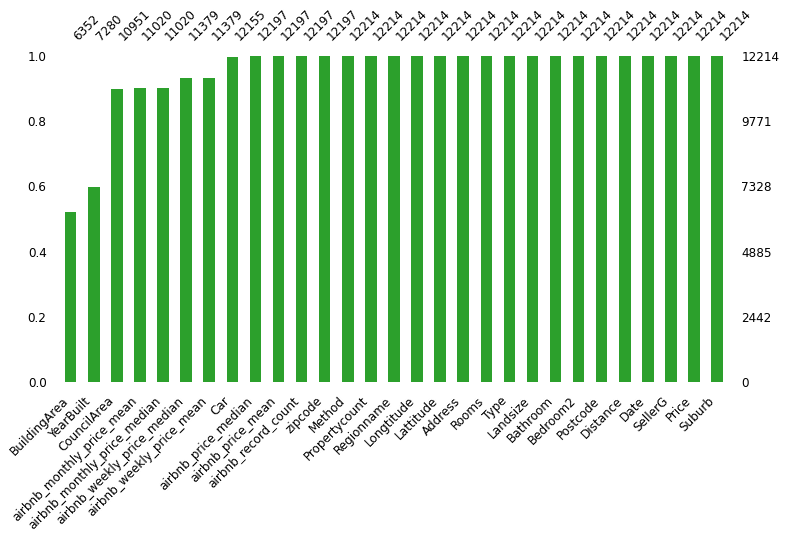

In [ ]:
import missingno as msno
msno.bar(df_merged_sales,figsize=(12, 6), sort="ascending",fontsize=12, color='tab:green',) 

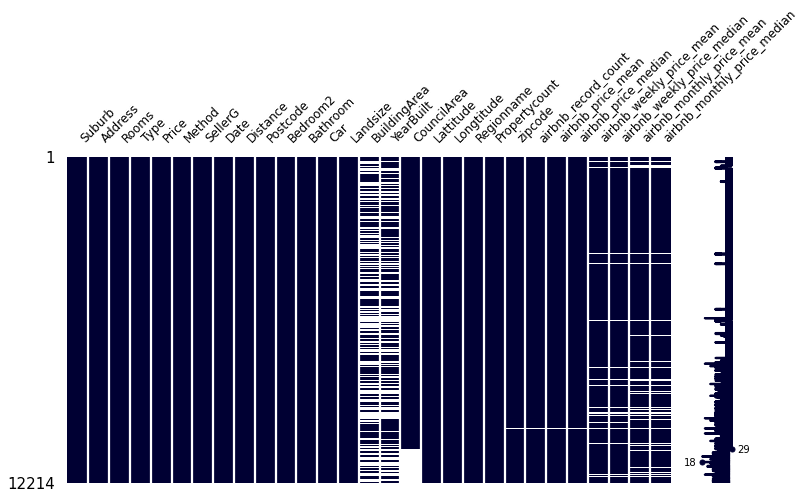

In [ ]:
msno.matrix(df_merged_sales,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

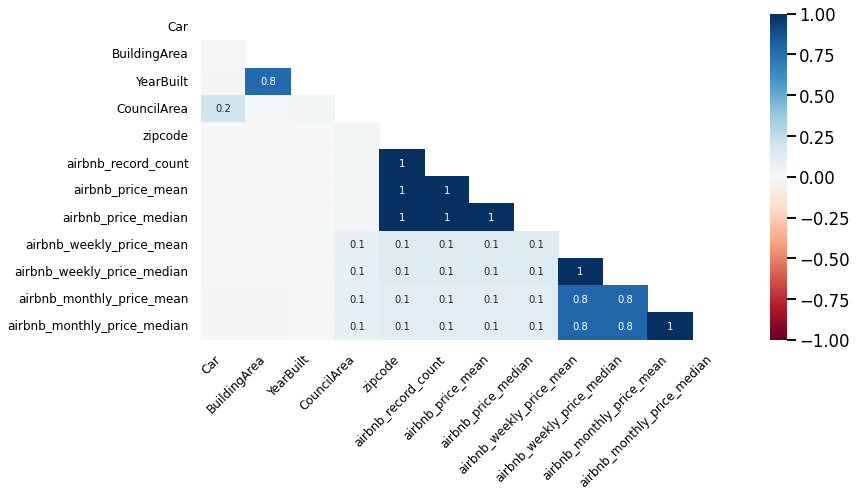

In [ ]:
msno.heatmap(df_merged_sales,figsize=(12, 6), fontsize=12)

In [40]:
print("Sales unique Suburbs", len(df_merged_sales.Suburb.unique()))
print("Sales unique Councils", len(df_merged_sales.CouncilArea.unique()))

Sales unique Suburbs 310
Sales unique Councils 33


In [41]:
suburb_council = df_melb_perc.groupby(['Suburb','CouncilArea']).count().reset_index()[['Suburb','CouncilArea','Propertycount']]
suburb_council = suburb_council.rename(columns={'Propertycount':'count'})

suburb_council

,Suburb,CouncilArea,count
0,Abbotsford,Yarra,54
1,Aberfeldie,Moonee Valley,32
2,Airport West,Moonee Valley,61
3,Albanvale,Brimbank,4
4,Albert Park,Port Phillip,50
...,...,...,...
330,Wonga Park,Manningham,1
331,Wyndham Vale,Wyndham,3
332,Yallambie,Banyule,23
333,Yarra Glen,Yarra Ranges,1


### 3. Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

### Rta//:

In [ ]:
# Guardando el conjunto de datos:
df_merged_sales.to_csv("melb_data_extended.csv", index=None)


from google.colab import files
files.download('melb_data_extended.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>